In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("HousingData.csv")
df = df.apply(pd.to_numeric, errors='coerce')
df = df.dropna()

print("✅ Data Loaded. Shape:", df.shape)
print("Columns:", df.columns)

✅ Data Loaded. Shape: (394, 14)
Columns: Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


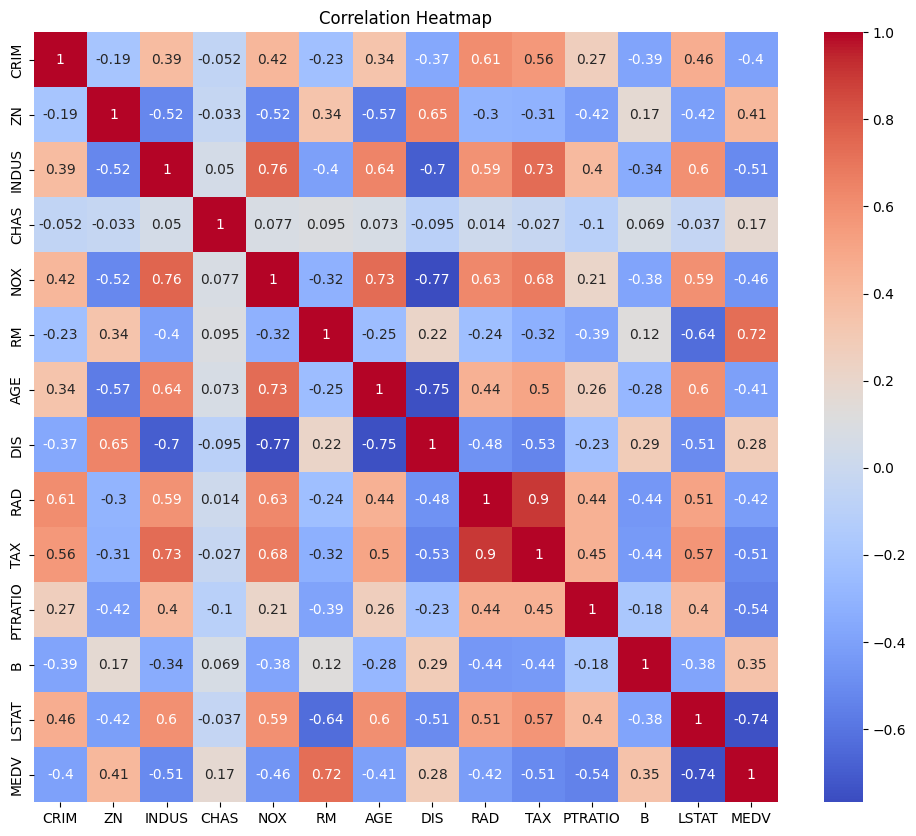

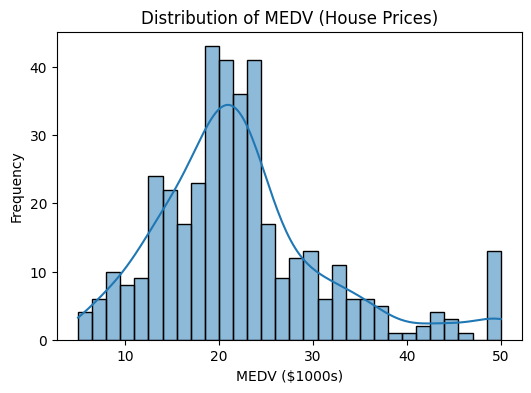

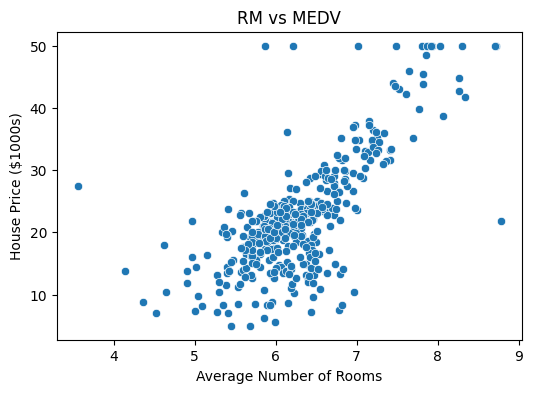

In [3]:
# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Histogram of MEDV
plt.figure(figsize=(6, 4))
sns.histplot(df["MEDV"], bins=30, kde=True)
plt.title("Distribution of MEDV (House Prices)")
plt.xlabel("MEDV ($1000s)")
plt.ylabel("Frequency")
plt.show()

# Rooms vs Price
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df["RM"], y=df["MEDV"])
plt.title("RM vs MEDV")
plt.xlabel("Average Number of Rooms")
plt.ylabel("House Price ($1000s)")
plt.show()

In [4]:
X = df.drop("MEDV", axis=1).values
y = df["MEDV"].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [5]:
model = Sequential([
    Dense(64, input_dim=X.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [6]:
history = model.fit(
    X_train, y_train,
    epochs=100, batch_size=8,
    validation_split=0.1, verbose=1
)

Epoch 1/100
36/36 [==============================] - 2s 13ms/step - loss: 512.9186 - mae: 20.7632 - val_loss: 418.0763 - val_mae: 19.0002
Epoch 2/100
36/36 [==============================] - 0s 5ms/step - loss: 369.0357 - mae: 17.1588 - val_loss: 225.7728 - val_mae: 13.3250
Epoch 3/100
36/36 [==============================] - 0s 4ms/step - loss: 147.0915 - mae: 9.9040 - val_loss: 72.4944 - val_mae: 6.0867
Epoch 4/100
36/36 [==============================] - 0s 4ms/step - loss: 48.0269 - mae: 5.3836 - val_loss: 44.9475 - val_mae: 4.8967
Epoch 5/100
36/36 [==============================] - 0s 4ms/step - loss: 30.4913 - mae: 4.2001 - val_loss: 28.4029 - val_mae: 3.8866
Epoch 6/100
36/36 [==============================] - 0s 4ms/step - loss: 22.9767 - mae: 3.6350 - val_loss: 22.6613 - val_mae: 3.5575
Epoch 7/100
36/36 [==============================] - 0s 4ms/step - loss: 19.8181 - mae: 3.3312 - val_loss: 18.4077 - val_mae: 3.3220
Epoch 8/100
36/36 [==============================] - 0s 5ms

In [7]:
loss, mae = model.evaluate(X_test, y_test)
print(f"\n📉 Test MAE: {mae:.2f}")

3/3 [==============================] - 0s 4ms/step - loss: 19.7460 - mae: 2.4664

📉 Test MAE: 2.47


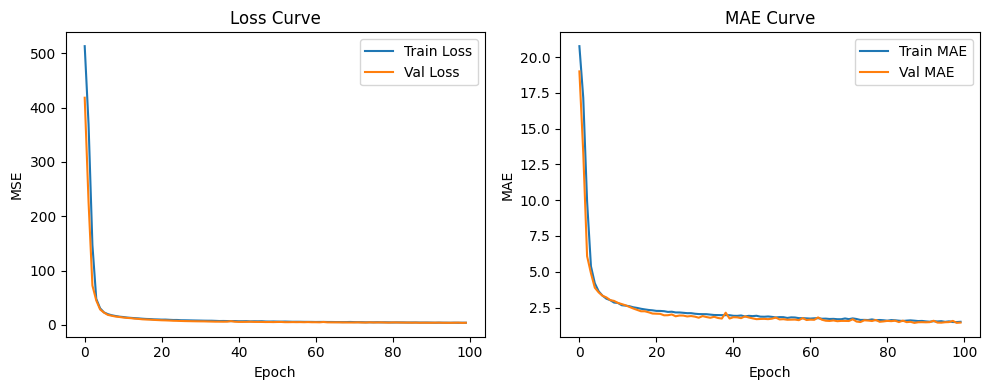

In [8]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.title("MAE Curve")
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.legend()
plt.tight_layout()
plt.show()

3/3 [==============================] - 0s 3ms/step


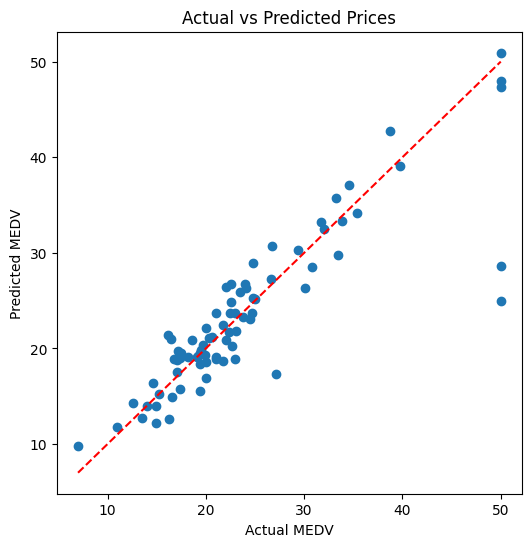

In [9]:
y_pred = model.predict(X_test)

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs Predicted Prices")
plt.show()